In [4]:
require(foreign)
require(nnet)
require(ggplot2)
require(reshape2)

In [5]:
ml <- read.dta("https://stats.idre.ucla.edu/stat/data/hsbdemo.dta")

In [6]:
with(ml, table(ses,prog))

        prog
ses      general academic vocation
  low         16       19       12
  middle      20       44       31
  high         9       42        7

In [7]:
with(ml, do.call(rbind, tapply(write, prog, function(x) c(M = mean(x), SD = sd(x)))))

,M,SD
general,51.33333,9.397775
academic,56.25714,7.943343
vocation,46.76000,9.318754


In [8]:
ml$progo2<-relevel(ml$prog, ref = "academic")

In [9]:
test<-multinom(progo2 ~ ses + write, data = ml)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 179.982880
final  value 179.981726 
converged


In [10]:
summary(test)

Call:
multinom(formula = progo2 ~ ses + write, data = ml)

Coefficients:
         (Intercept)  sesmiddle    seshigh      write
general     2.852198 -0.5332810 -1.1628226 -0.0579287
vocation    5.218260  0.2913859 -0.9826649 -0.1136037

Std. Errors:
         (Intercept) sesmiddle   seshigh      write
general     1.166441 0.4437323 0.5142196 0.02141097
vocation    1.163552 0.4763739 0.5955665 0.02221996

Residual Deviance: 359.9635 
AIC: 375.9635 

In [11]:
s<- summary(test)
z<- s$coefficients/s$standard.errors
z

,(Intercept),sesmiddle,seshigh,write
general,2.445214,-1.2018081,-2.261334,-2.705562
vocation,4.484769,0.6116747,-1.649967,-5.112689


In [12]:
p <- (1-pnorm(abs(z), 0, 1)) * 2
p

,(Intercept),sesmiddle,seshigh,write
general,0.0144766100,0.2294379,0.02373856,6.818902e-03
vocation,0.0000072993,0.5407530,0.09894976,3.176045e-07


In [13]:
exp(coef(test))

,(Intercept),sesmiddle,seshigh,write
general,17.32582,0.5866769,0.3126026,0.9437172
vocation,184.61262,1.3382809,0.3743123,0.8926116


In [14]:
pp<-fitted(test)
head(pp)

,academic,general,vocation
1,0.1482764,0.3382454,0.5134781
2,0.1202017,0.1806283,0.6991700
3,0.4186747,0.2368082,0.3445171
4,0.1726885,0.3508384,0.4764731
5,0.1001231,0.1689374,0.7309395
6,0.3533566,0.2377976,0.4088458


In [15]:
dses <- data.frame(ses = c("low", "middle", "high"), write = mean(ml$write))
predict(test, newdata = dses, "probs")

,academic,general,vocation
1,0.4396845,0.3581917,0.2021238
2,0.4777488,0.2283353,0.2939159
3,0.7009007,0.1784939,0.1206054


In [16]:
dwrite <- data.frame(ses = rep(c("low", "middle", "high"), each =41), write = rep(c(30:70), 3))
pp.write <- cbind(dwrite, predict(test, newdata = dwrite, type = "probs", se = TRUE))
by(pp.write[, 3:5], pp.write$ses, colMeans)

pp.write$ses: high
 academic   general  vocation 
0.6164315 0.1808037 0.2027648 
------------------------------------------------------------ 
pp.write$ses: low
 academic   general  vocation 
0.3972977 0.3278174 0.2748849 
------------------------------------------------------------ 
pp.write$ses: middle
 academic   general  vocation 
0.4256198 0.2010864 0.3732938 

In [17]:
lpp <- melt(pp.write, id.vars = c("ses", "write"), value.name = "probability")
head(lpp)

ses,write,variable,probability
low,30,academic,0.09843588
low,31,academic,0.10716868
low,32,academic,0.11650390
low,33,academic,0.12645834
low,34,academic,0.13704576
low,35,academic,0.14827643


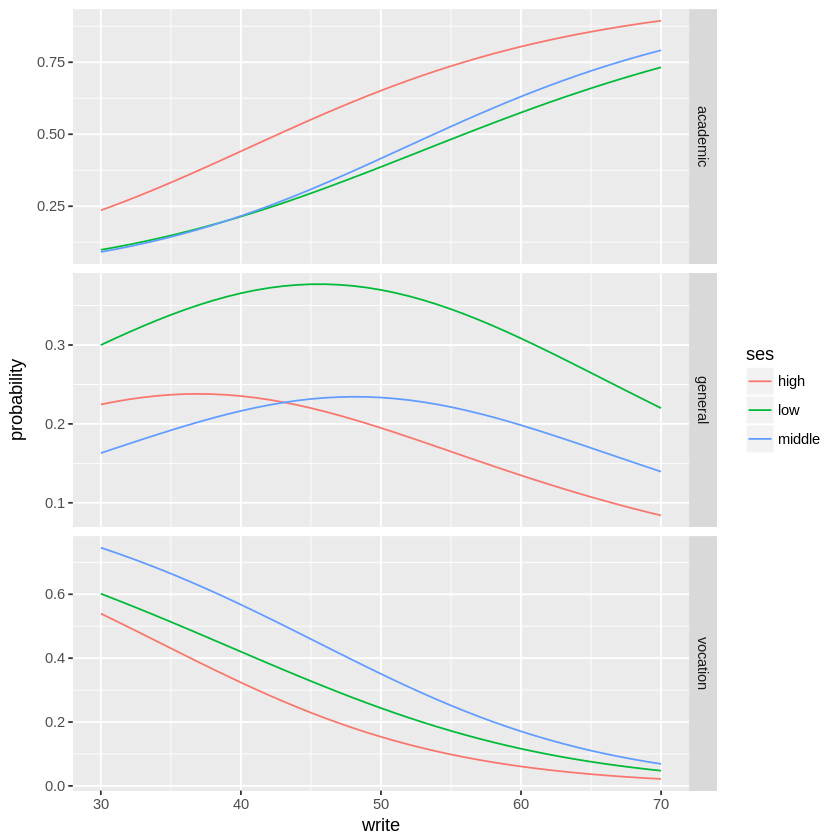

In [18]:
ggplot(lpp, aes(x = write, y = probability, colour = ses)) + geom_line() +
facet_grid(variable ~ ., scales = "free")